<b> Exploratory Data Analysis (EDA) on Supermarket Sales Data </b>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('supermarket_sales.csv', delimiter = ',')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


<b> To Do: </b>
<br>
<b> 1. Check If There is a Missing Values in Each Column </b>

In [3]:
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


<b> All Columns Do not Contain Any Missing Values! </b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

<b> To Do: </b>
<br>
<b> 2. Check the Unique Values in Some Columns </b>

In [5]:
for column in df.columns:
    if column in ('Invoice ID', 'Unit price', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross income'):
        continue
    unique_values = df[column].unique()
    print(column, ":", unique_values)

Branch : ['A' 'C' 'B']
City : ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type : ['Member' 'Normal']
Gender : ['Female' 'Male']
Product line : ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Quantity : [ 7  5  8  6 10  2  3  4  1  9]
Payment : ['Ewallet' 'Cash' 'Credit card']
gross margin percentage : [4.76190476]
Rating : [ 9.1  9.6  7.4  8.4  5.3  4.1  5.8  8.   7.2  5.9  4.5  6.8  7.1  8.2
  5.7  4.6  6.9  8.6  4.4  4.8  5.1  9.9  6.   8.5  6.7  7.7  7.5  7.
  4.7  7.6  7.9  6.3  5.6  9.5  8.1  6.5  6.1  6.6  5.4  9.3 10.   6.4
  4.3  4.   8.7  9.4  5.5  8.3  7.3  4.9  4.2  9.2  7.8  5.2  9.   8.8
  6.2  9.8  9.7  5.   8.9]


<b> To Do: </b>
<br>
<b> 3. Change All Value in Branch Column into 0, 1, or 2 </b>
<br>
<b> A => 0 <br>
    B => 1 <br> C => 2 </b>

In [6]:
df["Branch"] = df["Branch"].apply(lambda x: {
    'A': 0,
    'B': 1,
    'C': 2,
}.get(x, x))

In [7]:
df['Branch'].unique()

array([0, 2, 1], dtype=int64)

<b> To Do: </b>
<br>
<b> 4. Change All Value in City Column into 0, 1, or 2 </b>
<br>
<b> Mandalay => 0 <br>
    Naypyitaw => 1 <br> Yangon => 2 </b>

In [8]:
df["City"] = df["City"].apply(lambda x: {
    'Mandalay': 0,
    'Naypyitaw': 1,
    'Yangon': 2,
}.get(x, x))

In [9]:
df['City'].unique()

array([2, 1, 0], dtype=int64)

In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,2,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,2,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,2,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,2,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


<b> To Do: </b>
<br>
<b> 5. Change All Value in Customer type Column into 0 or 1 </b>
<br>
<b> Normal => 0 <br>
    Member => 1 </b>

In [11]:
df["Customer type"] = df["Customer type"].apply(lambda x: {
    'Normal': 0,
    'Member': 1,
}.get(x, x))

In [12]:
df['Customer type'].unique()

array([1, 0], dtype=int64)

<b> To Do: </b>
<br>
<b> 6. Change All Value in Gender Column into 0 or 1 </b>
<br>
<b> Male => 0 <br>
    Female => 1 </b>

In [13]:
df['Gender'] = df['Gender'].apply(lambda x: {
    'Male': 0,
    'Female': 1,
}.get(x, x))

In [14]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [15]:
lst = list(df['Product line'].unique())
lst.sort()
lst

['Electronic accessories',
 'Fashion accessories',
 'Food and beverages',
 'Health and beauty',
 'Home and lifestyle',
 'Sports and travel']

<b> To Do: </b>
<br>
<b> 7. Change All Value in Product line Column into 0, 1, 2, 3, 4, or 5 </b>
<br>
<b> Electronic accessories => 0 <br>
    Fashion accessories => 1 <br>
    Food and beverages => 2 <br>
    Health and beauty => 3 <br>
    Home and lifestyle => 4 <br>
    Sports and travel = > 5 <br>
</b>

In [16]:
df['Product line'] = df['Product line'].apply(lambda x: {
    'Electronic accessories': 0,
    'Fashion accessories': 1,
    'Food and beverages': 2,
    'Health and beauty': 3,
    'Home and lifestyle': 4,
    'Sports and travel': 5
}.get(x, x))

In [17]:
df['Product line'].unique()

array([3, 0, 4, 5, 2, 1], dtype=int64)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   int64  
 2   City                     1000 non-null   int64  
 3   Customer type            1000 non-null   int64  
 4   Gender                   1000 non-null   int64  
 5   Product line             1000 non-null   int64  
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [19]:
sorted(df['Payment'].unique())

['Cash', 'Credit card', 'Ewallet']

<b> To Do: </b>
<br>
<b> 8. Change All Value in Payment Column into 0, 1, or 2 </b>
<br>
<b> Cash => 0 <br>
    Credit Card => 1 <br>
    Ewallet => 2 <br>
</b>

In [20]:
df['Payment'] = df['Payment'].apply(lambda x: {
    'Cash': 0,
    'Credit card': 1,
    'Ewallet': 2,
}.get(x, x))

In [21]:
df['Payment'].unique()

array([2, 0, 1], dtype=int64)

<b> To Do: </b>
<br>
<b> 9. Change All Value in Date Column into Datetime datatype </b>

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   int64         
 2   City                     1000 non-null   int64         
 3   Customer type            1000 non-null   int64         
 4   Gender                   1000 non-null   int64         
 5   Product line             1000 non-null   int64         
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

<b> To Do: </b>
<br>
<b> 10. Change All Value in COGS Column into float datatype and round it to 2 digits after the decimal point. </b>

In [24]:
df['cogs'] = df['cogs'].astype(float).round(2)


In [25]:
df['cogs']

0      522.83
1       76.40
2      324.31
3      465.76
4      604.17
        ...  
995     40.35
996    973.80
997     31.84
998     65.82
999    618.38
Name: cogs, Length: 1000, dtype: float64

<b> To Do: </b>
<br>
<b> 11. Change All Value in gross margin percentage Column into float datatype and round it to 2 digits after the decimal point. </b>

In [26]:
df['gross margin percentage'] = df['gross margin percentage'].astype(float).round(2)


In [27]:
df['gross margin percentage']

0      4.76
1      4.76
2      4.76
3      4.76
4      4.76
       ... 
995    4.76
996    4.76
997    4.76
998    4.76
999    4.76
Name: gross margin percentage, Length: 1000, dtype: float64

<b> To Do: </b>
<br>
<b> 11. Change All Value in gross income Column into float datatype and round it to 2 digits after the decimal point. </b>

In [28]:
df['gross income'] = df['gross income'].astype(float).round(2)


In [29]:
df['gross income']

0      26.14
1       3.82
2      16.22
3      23.29
4      30.21
       ...  
995     2.02
996    48.69
997     1.59
998     3.29
999    30.92
Name: gross income, Length: 1000, dtype: float64

<b> To Do: </b>
<br>
<b> 12. Change All Value in Total Column into float datatype and round it to 2 digits after the decimal point. </b>

In [30]:
df['Total'] = df['Total'].astype(float).round(2)
df['Total']

0       548.97
1        80.22
2       340.53
3       489.05
4       634.38
        ...   
995      42.37
996    1022.49
997      33.43
998      69.11
999     649.30
Name: Total, Length: 1000, dtype: float64

<b> To Do: </b>
<br>
<b> 13. Change All Value in Tax 5% into float datatype and round it to 2 digits after the decimal point. </b>

In [31]:
df['Tax 5%'] = df['Tax 5%'].astype(float).round(2)
df['Tax 5%']

0      26.14
1       3.82
2      16.22
3      23.29
4      30.21
       ...  
995     2.02
996    48.69
997     1.59
998     3.29
999    30.92
Name: Tax 5%, Length: 1000, dtype: float64

In [32]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,2,1,1,3,74.69,7,26.14,548.97,2019-01-05,13:08,2,522.83,4.76,26.14,9.1
1,226-31-3081,2,1,0,1,0,15.28,5,3.82,80.22,2019-03-08,10:29,0,76.40,4.76,3.82,9.6
2,631-41-3108,0,2,0,0,4,46.33,7,16.22,340.53,2019-03-03,13:23,1,324.31,4.76,16.22,7.4
3,123-19-1176,0,2,1,0,3,58.22,8,23.29,489.05,2019-01-27,20:33,2,465.76,4.76,23.29,8.4
4,373-73-7910,0,2,0,0,5,86.31,7,30.21,634.38,2019-02-08,10:37,2,604.17,4.76,30.21,5.3


<b> DATA CLEANING PROCESS IS DONE! <br> NOW IT IS TIME TO ANALYZE IT! </b>

<b> To Do: <br>
    1. Sort the dataframe based on Invoice ID column, in an ascending order </b>

In [33]:
df = df.sort_values('Invoice ID', ascending=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
162,101-17-6199,0,2,0,0,2,45.79,7,16.03,336.56,2019-03-13,19:44,1,320.53,4.76,16.03,7.0
867,101-81-4070,2,1,1,1,3,62.82,2,6.28,131.92,2019-01-17,12:36,2,125.64,4.76,6.28,4.9
778,102-06-2002,2,1,1,0,5,25.25,5,6.31,132.56,2019-03-20,17:52,0,126.25,4.76,6.31,6.1
776,102-77-2261,2,1,1,0,3,65.31,7,22.86,480.03,2019-03-05,18:02,1,457.17,4.76,22.86,4.2
683,105-10-6182,0,2,1,0,1,21.48,2,2.15,45.11,2019-02-27,12:22,2,42.96,4.76,2.15,6.6


<b> To Do: <br>
    2. Find the most frequent branch in the Supermarket Sales Dataframe <b>

In [34]:
most_frequent_branch = df['Branch'].value_counts().idxmax()
most_frequent_branch

0

<b> So, it is "Branch A" is the most frequent branch in our Supermarket Sales Dataframe currently! </b>

<b> To Do: <br>
    3. Find the most frequent city in the Supermarket Sales Dataframe <b>

In [35]:
most_frequent_city = df['City'].value_counts().idxmax()
most_frequent_city

2

<b> So, it is "Yangon City" is the most frequent city in our Supermarket Sales Dataframe currently! </b>

<b> To Do: <br>
    4. Find the most frequent customer type in the Supermarket Sales Dataframe <b>

In [36]:
most_frequent_cust = df['Customer type'].value_counts().idxmax()
most_frequent_cust

1

<b> So, it is "Member" is the most frequent customer type in our Supermarket Sales Dataframe currently! </b>

<b> To Do: <br>
    5. Find the most frequent gender in the Supermarket Sales Dataframe <b>

In [37]:
most_frequent_gender = df['Gender'].value_counts().idxmax()
most_frequent_gender

1

<b> So, it is "Female" is the most frequent gender in our Supermarket Sales Dataframe currently! </b>

<b> To Do: <br>
    6. Find the most frequent product line in the Supermarket Sales Dataframe <b>

In [38]:
most_frequent_prod = df['Product line'].value_counts().idxmax()
most_frequent_prod

1

<b> So, it is "Fashion accessories" is the most frequent product line in our Supermarket Sales Dataframe currently! </b>

<b> To Do: <br>
    7. Find the most frequent payment method in the Supermarket Sales Dataframe <b>

In [39]:
most_frequent_payment = df['Payment'].value_counts().idxmax()
most_frequent_payment

2

<b> So, it is "Ewallet" is the most frequent payment method in our Supermarket Sales Dataframe currently! </b>

<b> To Do: <br>
    8. Perform a descriptive statistics on a Supermarket Sales Dataframe </b>

In [40]:
df.describe(include='all', datetime_is_numeric=True)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506,NaN,NaN,NaN,NaN,NaN
top,101-17-6199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19:48,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.988000,1.008000,0.501000,0.501000,2.452000,55.672130,5.510000,15.379510,322.966820,2019-02-14 00:05:45.600000,NaN,1.001000,307.58738,4.760000e+00,15.379510,6.97270
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,10.080000,1.000000,0.510000,10.680000,2019-01-01 00:00:00,NaN,0.000000,10.17000,4.760000e+00,0.510000,4.00000
25%,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,32.875000,3.000000,5.927500,124.425000,2019-01-24 00:00:00,NaN,0.000000,118.49750,4.760000e+00,5.927500,5.50000
50%,NaN,1.000000,1.000000,1.000000,1.000000,2.000000,55.230000,5.000000,12.090000,253.850000,2019-02-13 00:00:00,NaN,1.000000,241.76000,4.760000e+00,12.090000,7.00000
75%,NaN,2.000000,2.000000,1.000000,1.000000,4.000000,77.935000,8.000000,22.445000,471.350000,2019-03-08 00:00:00,NaN,2.000000,448.90500,4.760000e+00,22.445000,8.50000
max,NaN,2.000000,2.000000,1.000000,1.000000,5.000000,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,NaN,2.000000,993.00000,4.760000e+00,49.650000,10.00000


In [41]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
162,101-17-6199,0,2,0,0,2,45.79,7,16.03,336.56,2019-03-13,19:44,1,320.53,4.76,16.03,7.0
867,101-81-4070,2,1,1,1,3,62.82,2,6.28,131.92,2019-01-17,12:36,2,125.64,4.76,6.28,4.9
778,102-06-2002,2,1,1,0,5,25.25,5,6.31,132.56,2019-03-20,17:52,0,126.25,4.76,6.31,6.1
776,102-77-2261,2,1,1,0,3,65.31,7,22.86,480.03,2019-03-05,18:02,1,457.17,4.76,22.86,4.2
683,105-10-6182,0,2,1,0,1,21.48,2,2.15,45.11,2019-02-27,12:22,2,42.96,4.76,2.15,6.6


<b> Gross Margin Analysis </b>

In [42]:
# Calculate the avg gross margin percentage for each branch
avg_gmp = df.groupby('Branch')['gross margin percentage'].mean()
avg_gmp

Branch
0    4.76
1    4.76
2    4.76
Name: gross margin percentage, dtype: float64

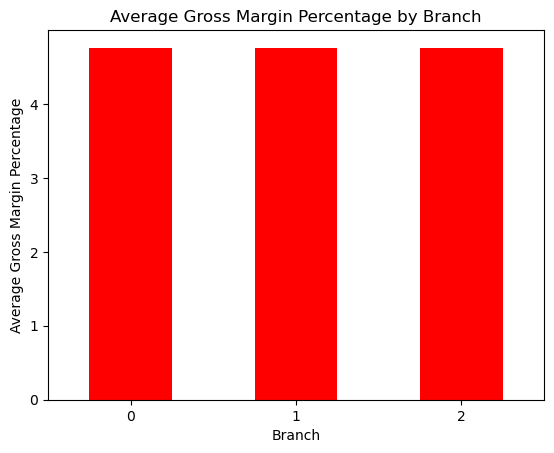

In [43]:
# Create a bar chart
import matplotlib.pyplot as plt
avg_gmp.plot(kind = 'bar', color = 'red')
plt.xticks(rotation = 0)
plt.xlabel('Branch')
plt.ylabel('Average Gross Margin Percentage')
plt.title('Average Gross Margin Percentage by Branch')

plt.show()

<b> Analyze the revenue trends over time by visualizing the Total rvenue over time using line chart or area chart. </b>

In [44]:
# Calculate the total revenue for each date
total_revenue = df.groupby('Date')[['cogs', 'gross income']].sum()
total_revenue

,cogs,gross income
Date,,
2019-01-01,4519.22,225.97
2019-01-02,1852.86,92.63
2019-01-03,1979.17,98.94
2019-01-04,1546.37,77.31
2019-01-05,3368.27,168.42
...,...,...
2019-03-26,1869.06,93.46
2019-03-27,2764.59,138.22
2019-03-28,2123.24,106.18


In [45]:
total_revenue['total revenue'] = total_revenue['cogs'] + total_revenue['gross income']
total_revenue

,cogs,gross income,total revenue
Date,,,
2019-01-01,4519.22,225.97,4745.19
2019-01-02,1852.86,92.63,1945.49
2019-01-03,1979.17,98.94,2078.11
2019-01-04,1546.37,77.31,1623.68
2019-01-05,3368.27,168.42,3536.69
...,...,...,...
2019-03-26,1869.06,93.46,1962.52
2019-03-27,2764.59,138.22,2902.81
2019-03-28,2123.24,106.18,2229.42


Text(0, 0.5, 'Total Revenue')

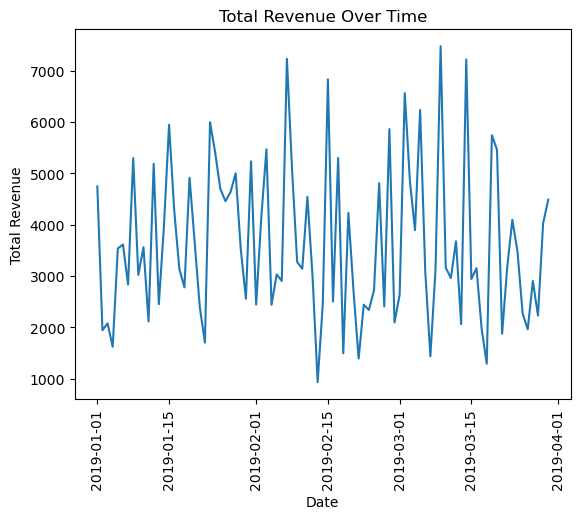

In [46]:
plt.plot(total_revenue.index, total_revenue['total revenue'])
plt.title('Total Revenue Over Time')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Total Revenue')

In [47]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
162,101-17-6199,0,2,0,0,2,45.79,7,16.03,336.56,2019-03-13,19:44,1,320.53,4.76,16.03,7.0
867,101-81-4070,2,1,1,1,3,62.82,2,6.28,131.92,2019-01-17,12:36,2,125.64,4.76,6.28,4.9
778,102-06-2002,2,1,1,0,5,25.25,5,6.31,132.56,2019-03-20,17:52,0,126.25,4.76,6.31,6.1
776,102-77-2261,2,1,1,0,3,65.31,7,22.86,480.03,2019-03-05,18:02,1,457.17,4.76,22.86,4.2
683,105-10-6182,0,2,1,0,1,21.48,2,2.15,45.11,2019-02-27,12:22,2,42.96,4.76,2.15,6.6


<AxesSubplot:xlabel='Gender', ylabel='Customer type'>

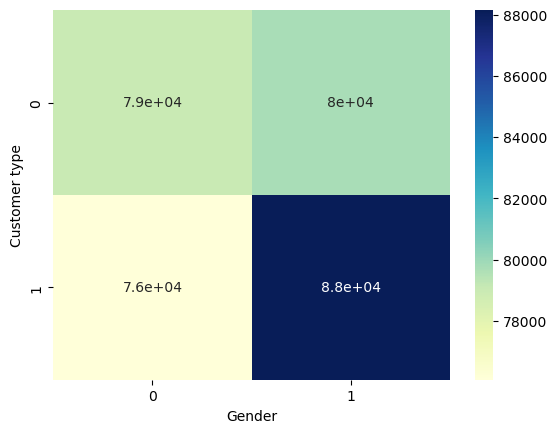

In [48]:
# Create a heatmap
import seaborn as sns
sales_by_cust_gender = df.pivot_table(index = 'Customer type', columns = 'Gender', values ='Total', aggfunc = 'sum')

sns.heatmap(sales_by_cust_gender, annot=True, cmap='YlGnBu')

<b> Conclusions: <br>
    "The most frequent customer type with the largest total sales is "Member". <br> The most frequent gender with the largest total sales is "Female". <br> Among "Normal" customer types, "Female" has the largest total sales. <br> Similarly, among "Member" customer types, "Female" also has the largest total sales." </b> 

<b> Analyze the total sales by product line </b>

In [49]:
# Calculate the total sales for each product line
total_sales_prod = df.groupby('Product line')['Total'].sum().reset_index()
total_sales_prod

,Product line,Total
0,0,54337.52
1,1,54305.88
2,2,56144.86
3,3,49193.81
4,4,53861.87
5,5,55122.88


<Figure size 1000x600 with 0 Axes>

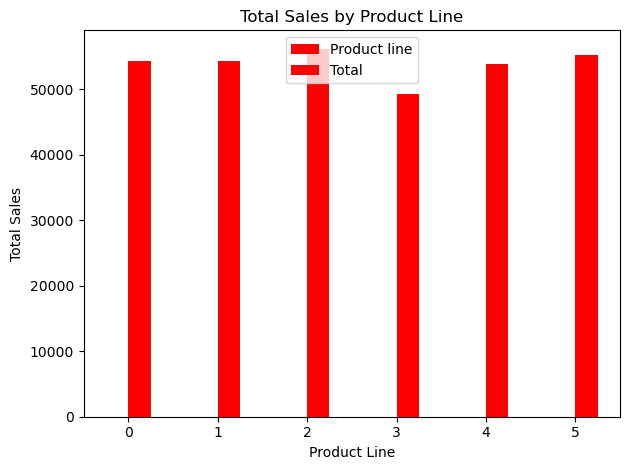

In [50]:
# Create a bar chart
fig = plt.figure(figsize=(10,6))
total_sales_prod.plot(kind = 'bar', color = 'red')
plt.xticks(rotation = 0)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

<b> Conclusions: <br> Based on the analysis of the sales data, it can be concluded that the "Food and Beverages" product line has the highest total sales. Therefore, it is recommended that the company should focus on increasing sales of this product line to maximize profits.</b>